# 18장 시퀀스 배열로 다루는 순환 신경망(RNN)
- 여러 개의 데이터가 순서대로 입려되었을 때 앞서 입력받은 데이터를 잠시 기억해 놓는 방법

### 1.LSTM을 이용한 로이터 뉴스 카테고리 분류하기

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [33]:
# 로이터 뉴스 데이터셋 불러오기
# 불러온 데이터 학습셋과 데이터셋으로 나누기
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [34]:
# 데이터를 확인한 후 출력

category = np.max(y_train) + 1
print(category, '카테고리') # 종류
print(len(X_train), '학습용 뉴스 기사') # 학습용
print(len(X_test), '테스트용 뉴스 기사') # 테스트용
print(X_train[0]) # 첫번째 인덱스 기사 출력 -> 문자를 숫자로 변환해서 사용

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [35]:
# 데이터 전처리
# 단어의 수를 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=100) # 단어의 수를 100개로
X_test = sequence.pad_sequences(X_test, maxlen=100)

In [36]:
# 원-핫 인코딩 처리
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
# 모델 구조
model = Sequential()
model.add(Embedding(1000, 100)) # 불러온 단어의 총수, 기사당 단어 수
model.add(LSTM(100, activation='tanh')) # 기사당 단어수, 기타 옵션
model.add(Dense(46, activation='softmax'))

In [38]:
# 모델의 실행 옵션 설정
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델을 실행
history = model.fit(X_train, y_train, epochs=200, batch_size=20, validation_data=(X_test, y_test),
                    callbacks=[early_stopping_callback])

Epoch 1/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.3719 - loss: 2.5189 - val_accuracy: 0.5396 - val_loss: 1.8095
Epoch 2/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.5348 - loss: 1.7816 - val_accuracy: 0.5873 - val_loss: 1.6718
Epoch 3/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.5917 - loss: 1.5881 - val_accuracy: 0.6313 - val_loss: 1.5236
Epoch 4/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.6460 - loss: 1.3932 - val_accuracy: 0.6456 - val_loss: 1.3638
Epoch 5/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6925 - loss: 1.2143 - val_accuracy: 0.6879 - val_loss: 1.2566
Epoch 6/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.7301 - loss: 1.0856 - val_accuracy: 0.7097 - val_loss: 1.2160
Epoch 7/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.7670 - loss: 0.9619 - val_accuracy: 0.7173 - val_loss: 1.1622
Epoch 8/200
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.7895 - loss: 0

In [39]:
# 테스트 정확도 출력
print('Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7423 - loss: 1.1883
Test Accuracy: 0.7311


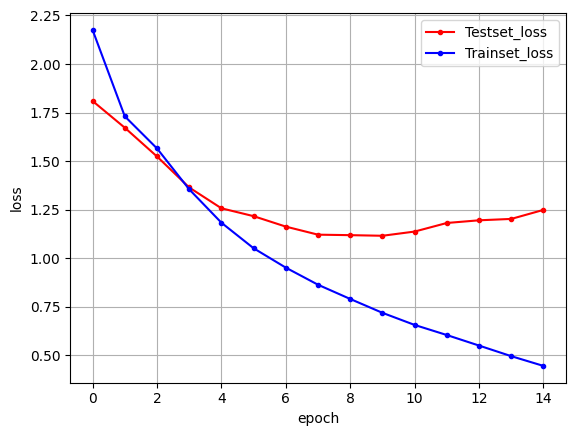

In [40]:
# 검증셋과 학습세 오차 저장

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 확인
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 2.LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [63]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [64]:
# 모델 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [66]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 60ms/step - accuracy: 0.6779 - loss: 0.5408 - val_accuracy: 0.8832 - val_loss: 0.2826
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9090 - loss: 0.2404 - val_accuracy: 0.8917 - val_loss: 0.2625
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9350 - loss: 0.1754 - val_accuracy: 0.8997 - val_loss: 0.2632
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 30s 64ms/step - accuracy: 0.9431 - loss: 0.1532 - val_accuracy: 0.8963 - val_loss: 0.2889
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 66ms/step - accuracy: 0.9657 - loss: 0.1056 - val_accuracy: 0.8920 - val_loss: 0.3060
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8802 - loss: 0.3342

 Test Accuracy: 0.8817


In [67]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 500, 100)       │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 500, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 496, 64)        │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 124, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 55)             │        26,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,675,562 (6.39 MB)

 Trainable params: 558,520 (2.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,117,042 (4.26 MB)

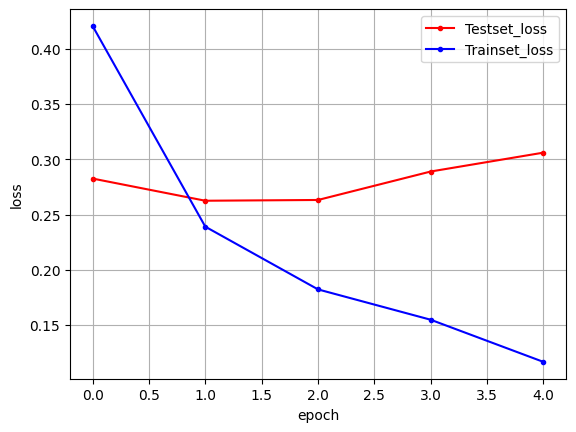

In [68]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프 확인
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 3.어텐션을 사용한 신경망

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [3]:
# 모델 설정
model = Sequential()
model.add(Embedding(5000, 500))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델을 실행합니다. - 오류 발생
history = model.fit(X_train, y_train, batch_size=40, epochs=100,  validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

In [ ]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()